# Binary Search

Using `in` to check for a value in an array where $n$ is the length of the array is $O(n)$. If we don't know anything about the array, we can't expect to do better. However, if the array happens to be presorted, we can use **binary search**.

The binary search algorithm is:
- Check the middle value to rule out half of the array.
- Do a binary search on the other half.

In [1]:
# Returns whether a value can be found in a sorted array between left and right indices.
# The algorithm is O(log n) where n = len(array).
def binary_search(value, array, left, right):
    if right < left:
        return False
    
    middle = (right + left) // 2
    
    if array[middle] < value:
        return binary_search(value, array, middle+1, right)
    elif array[middle] > value:
        return binary_search(value, array, left, middle-1)
    else:
        return True
    

Let's do some thorough testing

In [2]:
# This function prints something if our binary search fails
def test_binary_search():
    array = random_array()
    array.sort()
    for value in range(20):
        if binary_search(value, array, 0, len(array) - 1) != (value in array):
            print("Error searching", array, "for", value)

In [3]:
# This function creates and returns a small randomized array.
from random import randrange
def random_array():
    array = []
    n = randrange(20)
    while len(array) < n:
        array.append(randrange(20))
    return array

In [4]:
# This code should have no output.
for test in range(100):
    test_binary_search()

This function would be a bit simpler if we passed slices instead of indices.

In [5]:
# Returns whether a value can be found in a sorted array between left and right indices.
# The algorithm is O(n) where n = len(array).
def simple_binary_search(value, array):
    if len(array) == 0:
        return False
    
    middle = len(array) // 2
    
    if array[middle] < value:
        return simple_binary_search(value, array[middle+1:])
    elif array[middle] > value:
        return simple_binary_search(value, array[:middle])
    else:
        return True
    

In [6]:
# This function prints something if our binary search fails
def test_simple_binary_search():
    array = random_array()
    array.sort()
    for value in range(20):
        if simple_binary_search(value, array, 0, len(array) - 1) != (value in array):
            print("Error searching", array, "for", value)

In [7]:
for test in range(100):
    test_simple_binary_search

Let's compare these two versions.

In [8]:
# This function just lets us call binary_search without extra arguments.
def full_binary_search(value, array):
    return binary_search(value, array, 0, len(array) - 1)

In [9]:
# This function times a search on a range of problem sizes.
def timer(search, lengths):
    times = []
    for n in lengths:
        array = list(range(n))
        time = %timeit -n1 -r1 -o -q search(-1, array)
        times.append(time.average)
    return times

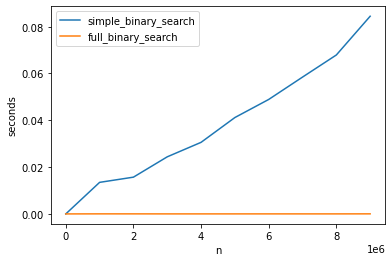

In [10]:
# This code plots some search times.
from matplotlib import pyplot
from numpy import arange

n = arange(1, 10_000_000, 1_000_000)

pyplot.plot(n, timer(simple_binary_search, n), label="simple_binary_search")
pyplot.plot(n, timer(full_binary_search, n), label="full_binary_search")

pyplot.ylabel("seconds")
pyplot.xlabel("n")
pyplot.legend()
pyplot.show()

Creating those slices at every step of the recursion makes the simpler implementation slower.